In [55]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [56]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1077 1077 462 462


# Decision Tree

Best parameters set found on development set:
 {'max_leaf_nodes': 15, 'min_samples_split': 15}

 Best Score 0.7634439587551046

 Grid scores on development set:
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.739 (+/-0.014) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.744 (+/-0.021) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.744 (+/-0.021) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.744 (+/-0.021) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.744 (+/-0.021) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.744 (+/-0.021) for {'m

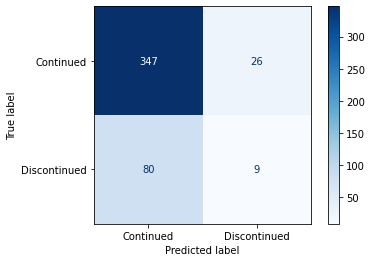

In [57]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{
    'min_samples_split': [i for i in range(5,80,5)], 
    'max_leaf_nodes':  [k for k in range(5,80,5)]
    }]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

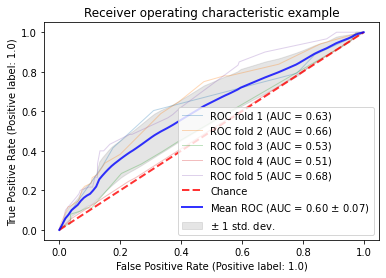

mean prec  0.7221763560439424
STD PREC 0.024345227145581832
mean recall  0.7816680062608401
STD recall 0.024345227145581832
mean f1  0.7370961617358611
STD f1 0.020305202594816007
sum of all confuion matrices
 [[1168   74]
 [ 262   35]]

average of all confuion matrices
 [[233  14]
 [ 52   7]]
[[0.94 0.06]
 [0.88 0.12]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_23904/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


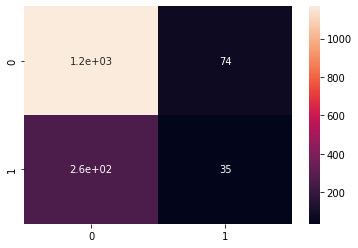

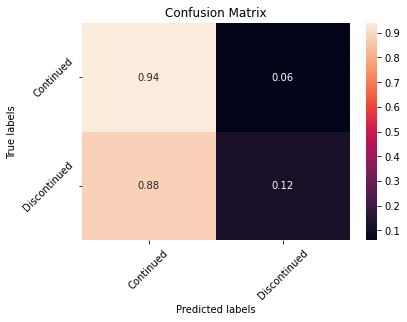

In [58]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);


# With SMOTE Oversampling

In [59]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 65, 'min_samples_split': 5}

 Best Score 0.7982642949268254

 Grid scores on development set:
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.691 (+/-0.062) for {'ma

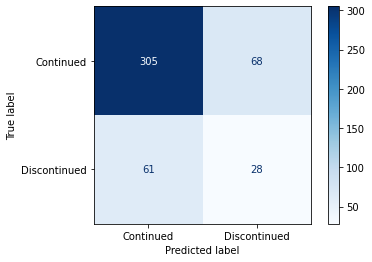

In [60]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

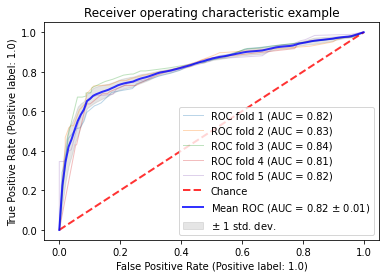

mean prec  0.8017267767147637
STD PREC 0.01676598370411891
mean recall  0.7963636363636364
STD recall 0.01676598370411891
mean f1  0.7923512516594329
STD f1 0.02019286377274619
sum of all confuion matrices
 [[1114  128]
 [ 320  638]]

average of all confuion matrices
 [[222  25]
 [ 64 127]]
[[0.9  0.1 ]
 [0.34 0.66]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_23904/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


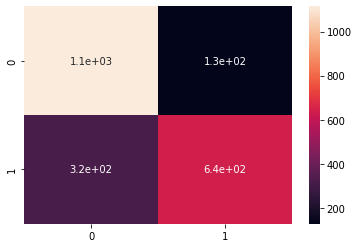

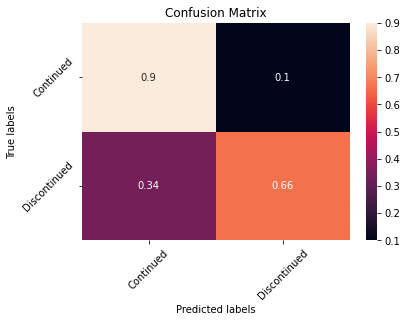

In [61]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);


# With Borderline-SMOTE Oversampling

In [62]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 5}

 Best Score 0.7821428171476145

 Grid scores on development set:
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.697 (+/-0.084) for {'ma

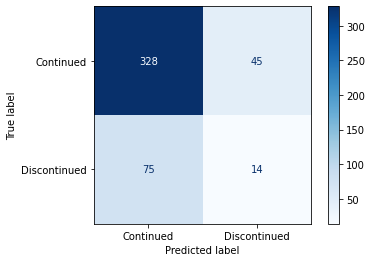

In [63]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

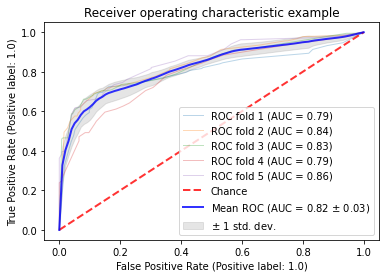

mean prec  0.783127125911979
STD PREC 0.02288184422354573
mean recall  0.7813636363636365
STD recall 0.02288184422354573
mean f1  0.778092472036222
STD f1 0.024229797067744613
sum of all confuion matrices
 [[1079  163]
 [ 318  640]]

average of all confuion matrices
 [[215  32]
 [ 63 128]]
[[0.87 0.13]
 [0.33 0.67]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_23904/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


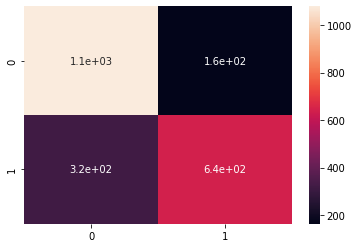

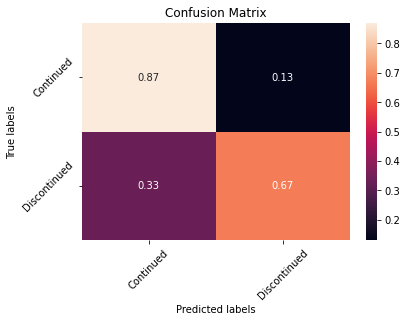

In [64]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);


# With ADASYN Oversampling

In [65]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1686 1686 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 5}

 Best Score 0.7935385865474652

 Grid scores on development set:
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.657 (+/-0.036) for {'ma

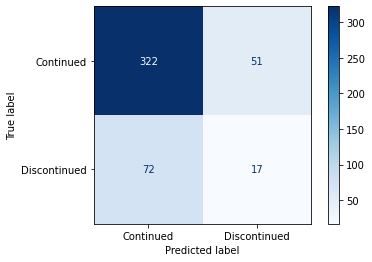

In [66]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

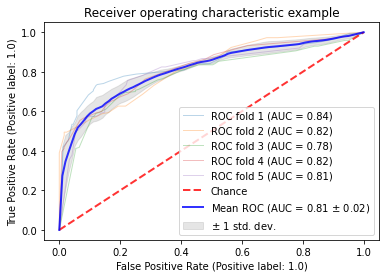

mean prec  0.7678159282563927
STD PREC 0.0228885186209672
mean recall  0.7644278202417737
STD recall 0.0228885186209672
mean f1  0.7589683521184054
STD f1 0.024296611251829893
sum of all confuion matrices
 [[1077  165]
 [ 341  565]]

average of all confuion matrices
 [[215  33]
 [ 68 113]]
[[0.87 0.13]
 [0.38 0.62]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_23904/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


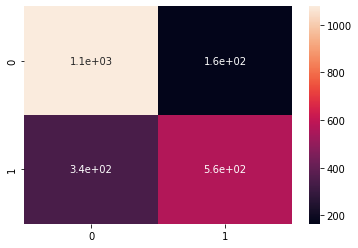

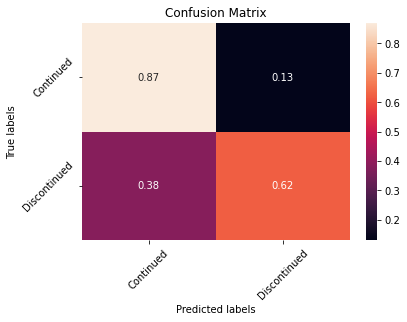

In [67]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);
